# Solution for AnalyticsVidhya Time Series Prediction Hackathon using Auto_TS Open Source Package
https://datahack.analyticsvidhya.com/contest/practice-problem-time-series-2/#About

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)

# First make sure you install Auto_TS Package

In [2]:
#!pip install git+https://github.com/AutoViML/Auto_TS.git --user

In [3]:
from auto_ts import auto_timeseries as ATS

Importing plotly failed. Interactive plots will not work.


Imported auto_timeseries version:0.0.28. Call by using:
model = auto_timeseries(score_type='rmse', forecast_period=forecast_period,
                time_interval='Month',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)

model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [4]:
datapath = '../Ram/Data_Sets/'

In [5]:
filename = 'time_series_train.csv'
train = pd.read_csv(datapath+filename,index_col=None)[:]
print(train.shape)
train.head()

(18288, 3)


,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [6]:
filename = 'time_series_test.csv'
test = pd.read_csv(datapath+filename,index_col=None)[:]
print(test.shape)
test.head()

(5112, 2)


,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [7]:
import copy
subm = copy.deepcopy(test)

In [8]:
ts_column = 'Datetime'
orig_target = 'Count'

In [9]:
score_type = 'rmse'
forecast_period = test.shape[0]
timeinterval = 'H'
non_seasonal_pdq = (2, 1, 2)
seasonality = True
seasonal_periods = 24
sep = ','

In [10]:
automl_model = ATS(
            score_type=score_type, time_interval=timeinterval,
            non_seasonal_pdq=None, seasonality=True, seasonal_period=24,
            model_type=['Prophet','ML'], forecast_period=500,
            verbose=2)

Start of Fit.....
Running Augmented Dickey-Fuller test with paramters:
    maxlag: 2 regression: c autolag: None
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |     -19.957655277459974      |
|           p-value           |             0.0              |
|          #Lags Used         |             2.0              |
| Number of Observations Used |           18285.0            |
|     Critical Value (1%)     |      -3.430707682157933      |
|     Critical Value (5%)     |      -2.861698082126097      |
|     Critical Value (10%)    |     -2.5668541429381015      |
+-----------------------------+------------------------------+
 this series is stationary
    Target variable given as = Count
Start of loading of data.....
Input is data frame. Performing Time Series Analysis
ts_col

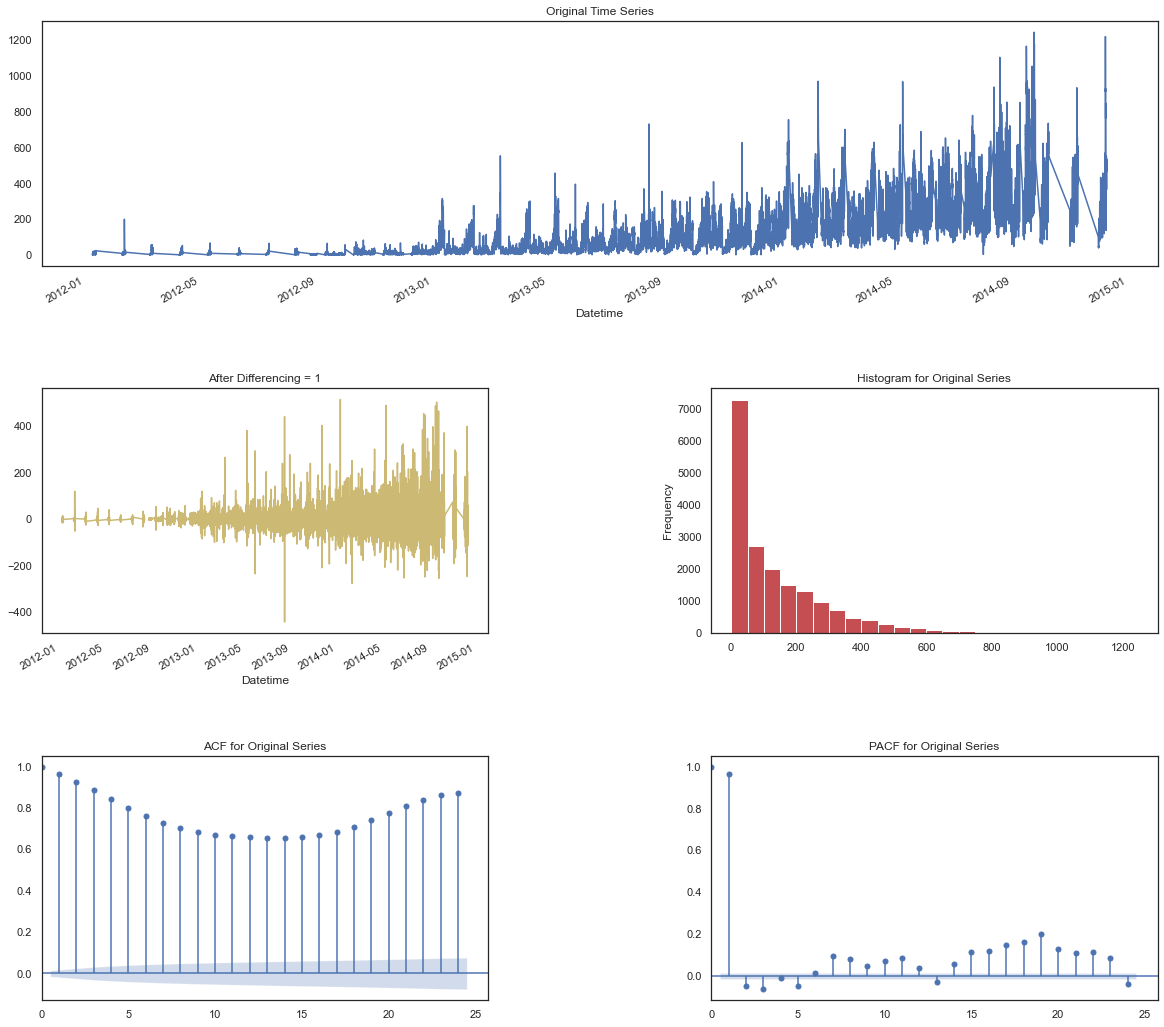

Time Interval is given as H
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...


INFO:numexpr.utils:NumExpr defaulting to 4 threads.


    Fit-Predict data (shape=(18288, 3)) with Confidence Interval = 0.95...
  Starting Prophet Fit
  End of Prophet Fit
NumObs: 18288
NFOLDS: 5
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5


Fold Number: 1 --> Train Shape: (15788, 3) Test Shape: (500, 3)
    RMSE = 129.19
    Std Deviation of Originals = 128.06
    Normalized RMSE = 101%
Cross Validation window: 1 completed


Fold Number: 2 --> Train Shape: (16288, 3) Test Shape: (500, 3)
    RMSE = 174.16
    Std Deviation of Originals = 138.56
    Normalized RMSE = 126%
Cross Validation window: 2 completed


Fold Number: 3 --> Train Shape: (16788, 3) Test Shape: (500, 3)
    RMSE = 209.28
    Std Deviation of Originals = 178.10
    Normalized RMSE = 118%
Cross Validation window: 3 completed


Fold Number: 4 --> Train Shape: (17288, 3) Test Shape: (500, 3)
    RMSE = 232.23
    Std Deviation of Originals = 184.08
    Normalized RMSE = 126%
Cross Validation window: 4 completed


Fold Nu

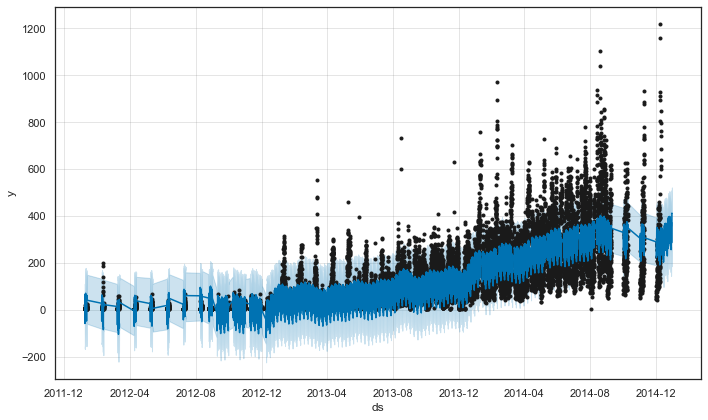

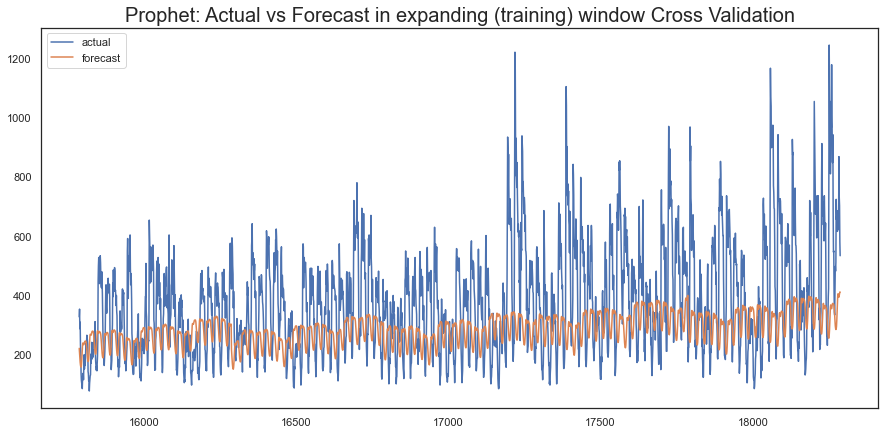

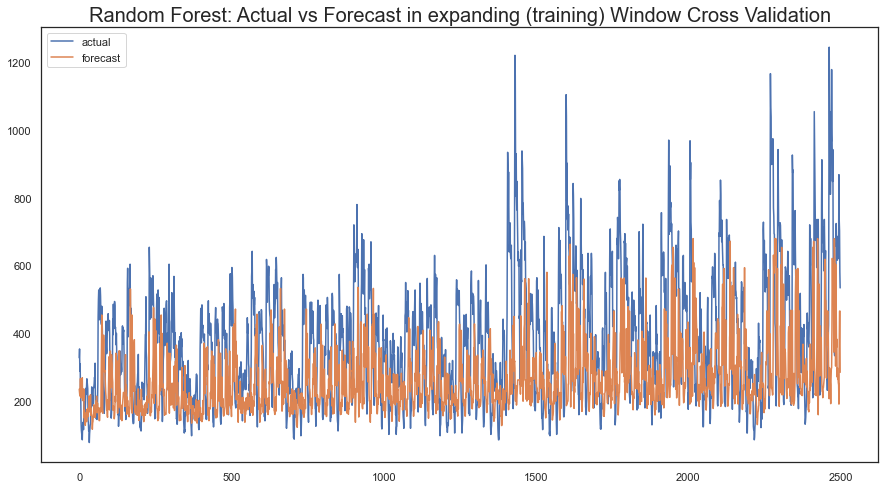

In [11]:
automl_model.fit(train, ts_column, orig_target)

In [12]:
pred1 = automl_model.predict(testdata=test,model='Prophet',simple=False)['yhat_upper']
pred1.shape

Building Forecast dataframe. Forecast Period = 5112


(5112,)

In [13]:
pred2 = automl_model.predict(testdata=test,model='ML',simple=False)['yhat']
pred2.shape


List of variables used in training Model = ['lag_10_Count']


(5112,)

In [21]:
disto

0.02926829268292683

# Using Auto_TS_yhat_upper 	scored 257.4 and Rank of ~600 out of 20,478 Participants which is Top 3% of Rankers. 
Not Bad for an AutoML Solution!

In [22]:
import copy
filename = 'time_series_test.csv'
subm = pd.read_csv(datapath+filename,index_col=None)[:]
subm['Count'] = pred1.values.astype(int)
subm['ID'] = test['ID'].values
subm = subm.reset_index(drop=True)
subm.drop(ts_column, axis=1,inplace=True)
print(subm.shape)
subm.head()

(5112, 2)


,ID,Count
0,18288,441
1,18289,423
2,18290,394
3,18291,388
4,18292,370


In [19]:
subm.to_csv('AV_Hack_TS.csv',index=False)

In [ ]:
disto